In [50]:
# First let's import the packages we will use in this project
# You can do this all now or as you need them
import pandas as pd
import numpy as np
import seaborn as sns
from sklearn.preprocessing import LabelEncoder

import matplotlib.pyplot as plt
import matplotlib.mlab as mlab
import matplotlib
plt.style.use('ggplot')
from matplotlib.pyplot import figure

%matplotlib inline
matplotlib.rcParams['figure.figsize'] = (12,8)

pd.options.mode.chained_assignment = None


In [16]:
# Now we need to read in the data
df = pd.read_csv(r'C:\Users\USER\Desktop\Portfolio\AgricultureData.csv')

In [18]:
df

,product_id,product_name,category,price_per_kg,units_shipped_kg,units_sold_kg,units_on_hand_kg,supplier,farm_location,sale_date
0,b12c721e-8301-4b08-8ac3-d435be9b8b32,Lamb,Livestock,14.10,19224,14905,4319,Organic Meats Co.,"O'Reillyboro, OR",2022-07-04
1,4a0f8862-c851-4073-bc17-3a3d93834902,Beef,Livestock,11.37,29504,4550,24954,Organic Meats Co.,"Lake Nora, AR",2023-10-21
2,be996df6-1780-4352-8b7d-1f927279aa49,Oranges,Fruits,2.59,1838,1722,116,Berry Fields,"East Friedaside, NM",2023-12-24
3,6c8adfc3-2114-4b78-a3e2-2269a6a0dc02,Milk,Dairy,1.34,6750,1232,5518,Fresh Dairy Farms,"East Javon, FL",2023-12-25
4,0bd5bf2b-be0a-4ba0-aa92-059021b169e3,Bananas,Fruits,1.78,48729,47020,1709,Golden Orchards,"Lake D'angelo, MN",2023-06-20
...,...,...,...,...,...,...,...,...,...,...
8888,c81f400e-c19f-417f-99fb-039a19506e85,Onions,Vegetables,0.85,10543,1330,9213,Fresh Harvest Co.,"Elyria, MS",2022-12-30
8889,6c8adfc3-2114-4b78-a3e2-2269a6a0dc02,Milk,Dairy,1.36,28336,18644,9692,Organic Valley,"Santa Cruz, ND",2023-07-20
8890,6c8adfc3-2114-4b78-a3e2-2269a6a0dc02,Milk,Dairy,1.20,34945,6793,28152,Organic Valley,"Cleveland, MN",2022-05-23
8891,857e56ee-a962-479e-99f0-983999e858bd,Cabbage,Vegetables,0.75,26470,12316,14154,Nature's Best Produce,"Waelchiberg, MN",2023-01-06


In [20]:
# We need to see if we have any missing data
# Let's loop through the data and see if there is anything missing

for col in df.columns:
    pct_missing = np.mean(df[col].isnull())
    print('{} - {}%'.format(col, round(pct_missing*100)))

product_id - 0%
product_name - 0%
category - 0%
price_per_kg - 0%
units_shipped_kg - 0%
units_sold_kg - 0%
units_on_hand_kg - 0%
supplier - 0%
farm_location - 0%
sale_date - 0%


In [22]:
print(df.dtypes)

product_id           object
product_name         object
category             object
price_per_kg        float64
units_shipped_kg      int64
units_sold_kg         int64
units_on_hand_kg      int64
supplier             object
farm_location        object
sale_date            object
dtype: object


<Axes: >

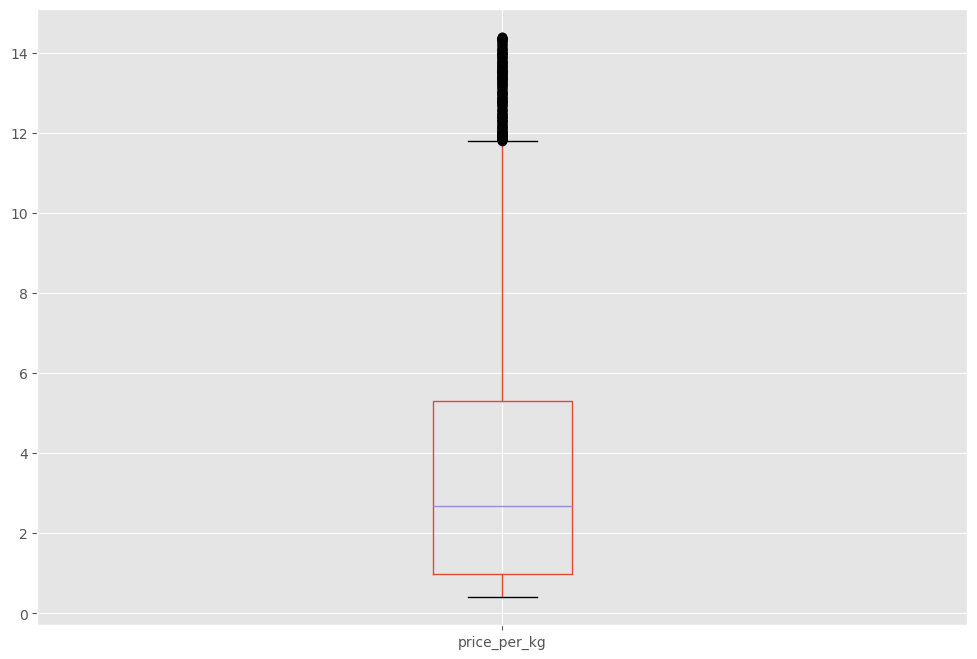

In [26]:
# Are there any Outliers?

df.boxplot(column=['price_per_kg'])

In [28]:
df.drop_duplicates()

,product_id,product_name,category,price_per_kg,units_shipped_kg,units_sold_kg,units_on_hand_kg,supplier,farm_location,sale_date
0,b12c721e-8301-4b08-8ac3-d435be9b8b32,Lamb,Livestock,14.10,19224,14905,4319,Organic Meats Co.,"O'Reillyboro, OR",2022-07-04
1,4a0f8862-c851-4073-bc17-3a3d93834902,Beef,Livestock,11.37,29504,4550,24954,Organic Meats Co.,"Lake Nora, AR",2023-10-21
2,be996df6-1780-4352-8b7d-1f927279aa49,Oranges,Fruits,2.59,1838,1722,116,Berry Fields,"East Friedaside, NM",2023-12-24
3,6c8adfc3-2114-4b78-a3e2-2269a6a0dc02,Milk,Dairy,1.34,6750,1232,5518,Fresh Dairy Farms,"East Javon, FL",2023-12-25
4,0bd5bf2b-be0a-4ba0-aa92-059021b169e3,Bananas,Fruits,1.78,48729,47020,1709,Golden Orchards,"Lake D'angelo, MN",2023-06-20
...,...,...,...,...,...,...,...,...,...,...
8888,c81f400e-c19f-417f-99fb-039a19506e85,Onions,Vegetables,0.85,10543,1330,9213,Fresh Harvest Co.,"Elyria, MS",2022-12-30
8889,6c8adfc3-2114-4b78-a3e2-2269a6a0dc02,Milk,Dairy,1.36,28336,18644,9692,Organic Valley,"Santa Cruz, ND",2023-07-20
8890,6c8adfc3-2114-4b78-a3e2-2269a6a0dc02,Milk,Dairy,1.20,34945,6793,28152,Organic Valley,"Cleveland, MN",2022-05-23
8891,857e56ee-a962-479e-99f0-983999e858bd,Cabbage,Vegetables,0.75,26470,12316,14154,Nature's Best Produce,"Waelchiberg, MN",2023-01-06


In [30]:
# Order our Data a little bit to see

df.sort_values(by=['category'], inplace=False, ascending=False)

,product_id,product_name,category,price_per_kg,units_shipped_kg,units_sold_kg,units_on_hand_kg,supplier,farm_location,sale_date
1465,857e56ee-a962-479e-99f0-983999e858bd,Cabbage,Vegetables,0.72,35016,29619,5397,Nature's Best Produce,"South Rahsaanbury, KY",2023-12-07
5370,0fe0ab3f-d8b0-4134-ac3b-0b3c39af304c,Lettuce,Vegetables,1.19,40609,26801,13808,Nature's Best Produce,"Hilo, ND",2023-05-30
1702,8e1653f9-1b33-405a-b4d8-2cb0af5a59eb,Tomatoes,Vegetables,2.60,26091,2797,23294,Green Valley Farms,"O'Connellville, AK",2023-12-04
5386,8dc0c292-d59b-4692-bcc4-2003c0177ea7,Peppers,Vegetables,1.88,14404,8424,5980,Green Valley Farms,"Watersfort, MO",2023-12-24
5384,0fe0ab3f-d8b0-4134-ac3b-0b3c39af304c,Lettuce,Vegetables,0.97,39924,37359,2565,Green Valley Farms,"Fort Celine, CA",2022-06-11
...,...,...,...,...,...,...,...,...,...,...
5516,9bb2d8db-a7ac-4d40-9d3c-0c96cafe7153,Butter,Dairy,5.11,13227,6929,6298,Dairyland Co-op,"Hillardburgh, ID",2022-09-04
4394,7ba3ccef-363a-40c5-9bbd-a451068846c5,Yogurt,Dairy,3.52,33738,2563,31175,Happy Cows Dairy,"West Santastad, SD",2022-12-07
619,7ba3ccef-363a-40c5-9bbd-a451068846c5,Yogurt,Dairy,3.27,29568,25725,3843,Dairyland Co-op,"South Eldred, IN",2023-12-14
4397,57ad2178-9598-4981-b0f7-78a91162821e,Cheese,Dairy,8.87,31792,12348,19444,Fresh Dairy Farms,"Harrischester, KY",2023-12-27


<Axes: xlabel='units_sold_kg', ylabel='price_per_kg'>

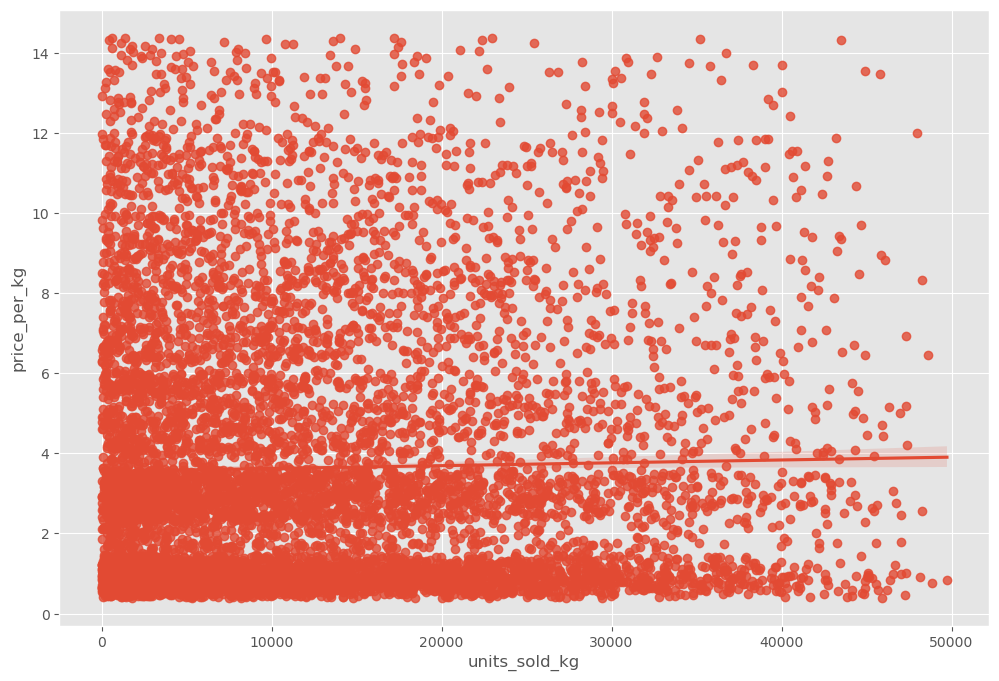

In [44]:
sns.regplot(x="units_sold_kg", y="price_per_kg", data=df)

In [56]:
df['category_numeric'] = LabelEncoder().fit_transform(df['category'])
df['supplier_numeric'] = LabelEncoder().fit_transform(df['supplier'])
df['farm_location_numeric'] = LabelEncoder().fit_transform(df['farm_location'])
df['product_name_numeric'] = LabelEncoder().fit_transform(df['product_name'])
#df['product_id_numeric'] = LabelEncoder().fit_transform(df['product_id'])


In [62]:
# Using factorize - this assigns a random numeric value for each unique categorical value

df.apply(lambda x: x.factorize()[0]).corr(method='pearson')

,product_id,product_name,category,price_per_kg,units_shipped_kg,units_sold_kg,units_on_hand_kg,supplier,farm_location,sale_date,category_numeric,supplier_numeric,farm_location_numeric,product_name_numeric,product_id_numeric
product_id,1.000000,1.000000,0.348203,-0.259092,0.012983,0.014276,0.019814,0.084002,0.016425,0.009766,0.348203,0.084002,0.016425,1.000000,1.000000
product_name,1.000000,1.000000,0.348203,-0.259092,0.012983,0.014276,0.019814,0.084002,0.016425,0.009766,0.348203,0.084002,0.016425,1.000000,1.000000
category,0.348203,0.348203,1.000000,-0.444520,0.023072,0.021208,0.019626,0.278811,0.026918,0.011008,1.000000,0.278811,0.026918,0.348203,0.348203
price_per_kg,-0.259092,-0.259092,-0.444520,1.000000,0.126570,0.128833,0.129393,-0.143577,0.135061,0.040882,-0.444520,-0.143577,0.135061,-0.259092,-0.259092
units_shipped_kg,0.012983,0.012983,0.023072,0.126570,1.000000,0.797105,0.794170,0.011201,0.913210,0.108927,0.023072,0.011201,0.913210,0.012983,0.012983
units_sold_kg,0.014276,0.014276,0.021208,0.128833,0.797105,1.000000,0.757295,0.013816,0.861913,0.116194,0.021208,0.013816,0.861913,0.014276,0.014276
units_on_hand_kg,0.019814,0.019814,0.019626,0.129393,0.794170,0.757295,1.000000,0.017147,0.860452,0.113359,0.019626,0.017147,0.860452,0.019814,0.019814
supplier,0.084002,0.084002,0.278811,-0.143577,0.011201,0.013816,0.017147,1.000000,0.012686,0.010246,0.278811,1.000000,0.012686,0.084002,0.084002
farm_location,0.016425,0.016425,0.026918,0.135061,0.913210,0.861913,0.860452,0.012686,1.000000,0.118251,0.026918,0.012686,1.000000,0.016425,0.016425
sale_date,0.009766,0.009766,0.011008,0.040882,0.108927,0.116194,0.113359,0.010246,0.118251,1.000000,0.011008,0.010246,0.118251,0.009766,0.009766


In [66]:
df.apply(lambda x: x.factorize()[0]).corr(method='kendall')

,product_id,product_name,category,price_per_kg,units_shipped_kg,units_sold_kg,units_on_hand_kg,supplier,farm_location,sale_date,category_numeric,supplier_numeric,farm_location_numeric,product_name_numeric,product_id_numeric
product_id,1.000000,1.000000,0.256628,-0.155539,0.009046,0.010134,0.013856,0.061843,0.011394,0.007053,0.256628,0.061843,0.011394,1.000000,1.000000
product_name,1.000000,1.000000,0.256628,-0.155539,0.009046,0.010134,0.013856,0.061843,0.011394,0.007053,0.256628,0.061843,0.011394,1.000000,1.000000
category,0.256628,0.256628,1.000000,-0.324552,0.016564,0.015255,0.014232,0.216279,0.019500,0.007791,1.000000,0.216279,0.019500,0.256628,0.256628
price_per_kg,-0.155539,-0.155539,-0.324552,1.000000,0.069568,0.073007,0.071713,-0.102444,0.072224,0.033024,-0.324552,-0.102444,0.072224,-0.155539,-0.155539
units_shipped_kg,0.009046,0.009046,0.016564,0.069568,1.000000,0.738520,0.737267,0.007783,0.886158,0.076627,0.016564,0.007783,0.886158,0.009046,0.009046
units_sold_kg,0.010134,0.010134,0.015255,0.073007,0.738520,1.000000,0.688018,0.009886,0.817087,0.082066,0.015255,0.009886,0.817087,0.010134,0.010134
units_on_hand_kg,0.013856,0.013856,0.014232,0.071713,0.737267,0.688018,1.000000,0.011966,0.816058,0.080507,0.014232,0.011966,0.816058,0.013856,0.013856
supplier,0.061843,0.061843,0.216279,-0.102444,0.007783,0.009886,0.011966,1.000000,0.008756,0.006884,0.216279,1.000000,0.008756,0.061843,0.061843
farm_location,0.011394,0.011394,0.019500,0.072224,0.886158,0.817087,0.816058,0.008756,1.000000,0.081101,0.019500,0.008756,1.000000,0.011394,0.011394
sale_date,0.007053,0.007053,0.007791,0.033024,0.076627,0.082066,0.080507,0.006884,0.081101,1.000000,0.007791,0.006884,0.081101,0.007053,0.007053


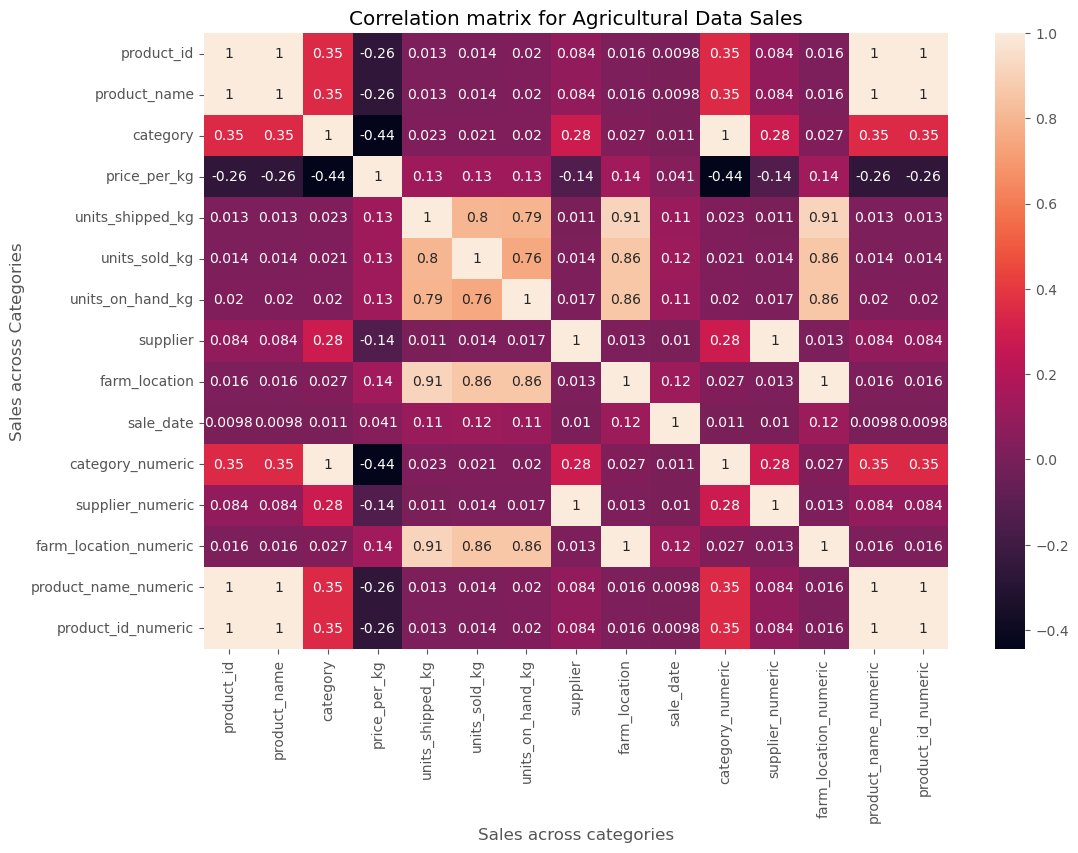

In [68]:
correlation_matrix = df.apply(lambda x: x.factorize()[0]).corr(method='pearson')

sns.heatmap(correlation_matrix, annot = True)

plt.title("Correlation matrix for Agricultural Data Sales")

plt.xlabel("Sales across categories")

plt.ylabel("Sales across Categories")

plt.show()

In [70]:
correlation_mat = df.apply(lambda x: x.factorize()[0]).corr()

corr_pairs = correlation_mat.unstack()

print(corr_pairs)

product_id          product_id               1.000000
                    product_name             1.000000
                    category                 0.348203
                    price_per_kg            -0.259092
                    units_shipped_kg         0.012983
                                               ...   
product_id_numeric  category_numeric         0.348203
                    supplier_numeric         0.084002
                    farm_location_numeric    0.016425
                    product_name_numeric     1.000000
                    product_id_numeric       1.000000
Length: 225, dtype: float64


In [72]:
sorted_pairs = corr_pairs.sort_values(kind="quicksort")

print(sorted_pairs)

price_per_kg           category                -0.444520
category               price_per_kg            -0.444520
category_numeric       price_per_kg            -0.444520
price_per_kg           category_numeric        -0.444520
product_name           price_per_kg            -0.259092
                                                  ...   
supplier_numeric       supplier_numeric         1.000000
farm_location_numeric  farm_location            1.000000
                       farm_location_numeric    1.000000
units_on_hand_kg       units_on_hand_kg         1.000000
product_id_numeric     product_id_numeric       1.000000
Length: 225, dtype: float64


In [74]:
# We can now take a look at the ones that have a high correlation (> 0.5)

strong_pairs = sorted_pairs[abs(sorted_pairs) > 0.5]

print(strong_pairs)


units_on_hand_kg       units_sold_kg            0.757295
units_sold_kg          units_on_hand_kg         0.757295
units_on_hand_kg       units_shipped_kg         0.794170
units_shipped_kg       units_on_hand_kg         0.794170
                       units_sold_kg            0.797105
units_sold_kg          units_shipped_kg         0.797105
farm_location_numeric  units_on_hand_kg         0.860452
units_on_hand_kg       farm_location            0.860452
                       farm_location_numeric    0.860452
farm_location          units_on_hand_kg         0.860452
                       units_sold_kg            0.861913
farm_location_numeric  units_sold_kg            0.861913
units_sold_kg          farm_location_numeric    0.861913
                       farm_location            0.861913
farm_location          units_shipped_kg         0.913210
farm_location_numeric  units_shipped_kg         0.913210
units_shipped_kg       farm_location_numeric    0.913210
                       farm_loc